In [1]:
%load_ext autoreload
%autoreload 2
import os

import cordex as cx
import geopandas as gpd
from cartopy import crs as ccrs

In [4]:
wkd = os.getcwd()
wkd

'/home/g/g300047/SCRIPTS/github/heat-indicators-africa/Notebooks'

open shape files 

In [2]:
#world
home='/home/g/g300047/GITLAB/climate_fact_data/'

#world
shpfile=os.path.join(home,'climate_fact_data/data/shp/ne_10m_admin_0_countries.shp')
#Africa
shpfile_w=os.path.join(home,'climate_fact_data/data/shp/merged_WASCAL_region.shp')
shpfile_s=os.path.join(home,'climate_fact_data/data/shp/ne_10m_admin_0_countries_small.shp')

globfile = gpd.read_file(shpfile)
globfile_w = gpd.read_file(shpfile_w)
globfile_s = gpd.read_file(shpfile_s)
#plotdir
plotdir='/work/ch0636/g300047/cicles/timeseries_plots_bulletin'

look at files

In [3]:
globfile[:3]
#globfile.columns.to_list()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


In [4]:
# Find the column containing the value 'Africa'
for column in globfile.columns:
    if globfile[column].dtype == 'object':  # Check only string/object columns
        if 'Africa' in globfile[column].unique():
            print(f"Column '{column}' contains 'Africa'")

Column 'CONTINENT' contains 'Africa'
Column 'REGION_UN' contains 'Africa'


In [5]:
# nuts3_merged , just as reference, because it works with climate fact data

nuts3_merged='climate_fact_data/data/shp/NUTS3_merged_counites_less_than_400m2.shp'
nutsfile=os.path.join(home,nuts3_merged)
nuts=gpd.read_file(nutsfile) 
nuts[:3]

,ADE,ARS,ARS_0,GEN,name,geometry
0,4,01001,010010000000,Flensburg,01001_Flensburg,"POLYGON ((9.48982 54.82296, 9.50467 54.81004, ..."
1,4,01002,010020000000,Kiel,01002_Kiel,"POLYGON ((10.19057 54.38909, 10.1837 54.3891, ..."
2,4,01003,010030000000,Lübeck,01003_Lübeck,"POLYGON ((10.89297 53.95695, 10.90337 53.95705..."


In [6]:
globfile[:3]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


adjust global file to nuts3 file, to make it work in cfd

In [7]:
selected_columns = ['LABELRANK', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'SOVEREIGNT', 'geometry']

globfile_selected = globfile[selected_columns]

globfile_selected = globfile_selected.rename(columns={
    'LABELRANK': 'ADE',
    'SOV_A3': 'ARS',
    'ADM0_DIF': 'ARS_0',
    'LEVEL': 'GEN',
    'SOVEREIGNT': 'region',
    'geometry': 'geometry'
})

globfile_selected[:3]
#save the selected columns to a new shapefile

output_shpfile = os.path.join(home, 'climate_fact_data/data/shp/globfile_selected.shp')
globfile_selected.to_file(output_shpfile)
globfile_selected[:3]

,ADE,ARS,ARS_0,GEN,region,geometry
0,2,IDN,0,2,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,3,MYS,0,2,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,2,CHL,0,2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


select wascal countries

In [8]:
WASCAL_countries = ['Benin', 
    'Burkina Faso', 
    #'Cabo Verde',
    'Ivory Coast', 
    'Gambia',
    'Ghana', 
    'Guinea',
    'Niger',
    'Mali', 
    'Nigeria', 
    'Senegal', 
    'Togo']


<Axes: >

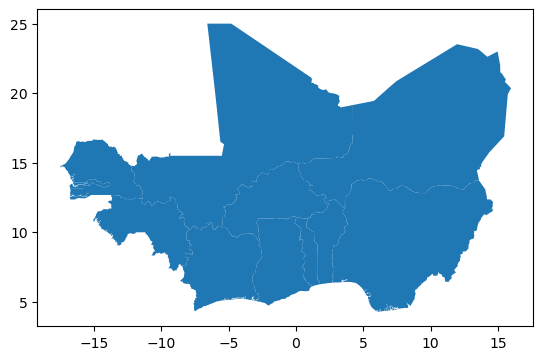

In [11]:
# Filter the DataFrame to include only the countries in WASCAL_countries
globfile_selected_w = globfile_selected[globfile_selected['region'].isin(WASCAL_countries)]
# Save the filtered DataFrame to a new shapefile
output_shpfile = os.path.join(home, 'climate_fact_data/data/shp/globfile_selected_WASCAL.shp')  
globfile_selected_w.to_file(output_shpfile)
globfile_selected_w[:3]
globfile_selected_w.plot()

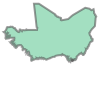

In [12]:
from shapely.ops import unary_union

# Combine all geometries of WASCAL countries into one geometry
combined_geometry = unary_union(globfile_selected_w['geometry'])

# Display the combined geometry
combined_geometry

<Axes: >

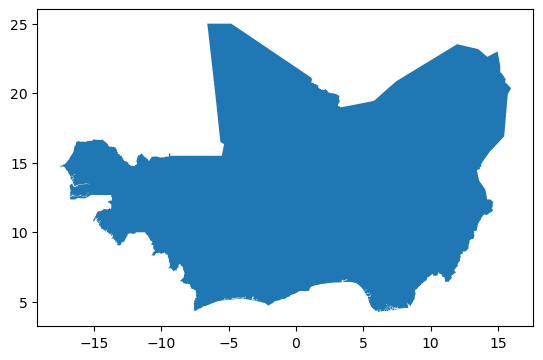

In [13]:
globfile_w.plot()

In [74]:
globfile_w[:3]
globfile_selected_w[:3]


,ADE,ARS,ARS_0,GEN,region,geometry
82,3,GIN,0,2,Guinea,"POLYGON ((-13.3011 9.04149, -13.31237 9.04833,..."
95,3,CIV,0,2,Ivory Coast,"MULTIPOLYGON (((-7.98966 10.16199, -7.9709 10...."
97,3,MLI,0,2,Mali,"POLYGON ((-12.26413 14.77494, -12.24679 14.767..."


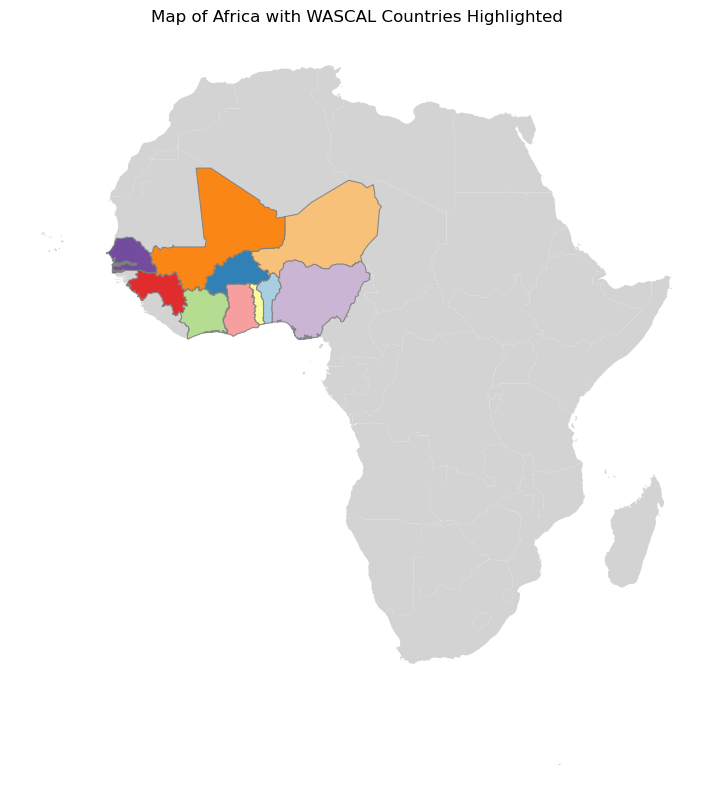

In [15]:
import matplotlib.pyplot as plt
africa = globfile[globfile['CONTINENT'] == 'Africa']


# Plot Africa
fig, ax = plt.subplots(figsize=(10, 10))
africa.plot(ax=ax, color='lightgrey')


# Highlight all countries from WASCAL_countries in paired colors
colors = plt.cm.Paired(range(len(WASCAL_countries)))
for i, country in enumerate(WASCAL_countries):
    africa[africa['SOVEREIGNT'] == country].plot(ax=ax, color=colors[i],
                                                  edgecolor='grey',
                                                  linewidth=0.8,
                                                  alpha=0.9)
    #africa.boundary.plot(ax=ax, color='grey')
#africa[africa['SOVEREIGNT'] == 'Nigeria'].plot(ax=ax, color='red')

# Set plot title and remove axis
ax.set_title('Map of Africa with WASCAL Countries Highlighted')
ax.axis('off')
# Save the plot to a file
output_plot_path = os.path.join(plotdir, 'africa_wascal_map.png')
fig.savefig(output_plot_path, dpi=300, bbox_inches='tight')
# Show plot
plt.show()